In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 

## Valence, Arousal, and Dominance Means for Certain English Words

In [2]:
def get_mood():
    
    df = pd.read_csv('Ratings_Warriner_et_al.csv', index_col=0)
    df = df[['Word','V.Mean.Sum', 'A.Mean.Sum','D.Mean.Sum']]
  
    df.columns=['word', 'valence', 'arousal', 'dominance']
    df.set_index('word',inplace=True)
    words = df.to_dict('index')

    return df, words

mood_df, words = get_mood()

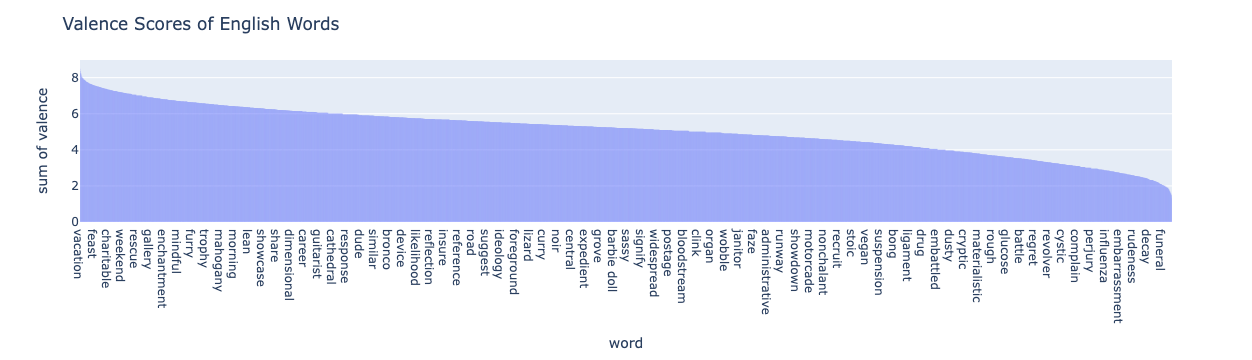

In [66]:
import plotly.express as px

valence_df = mood_df.sort_values(by=['valence'], ascending = False)
fig = px.histogram(valence_df, x=valence_df.index, y = 'valence')
fig.update_layout(
    title={
        'text': 'Valence Scores of English Words',
    })
fig.show()

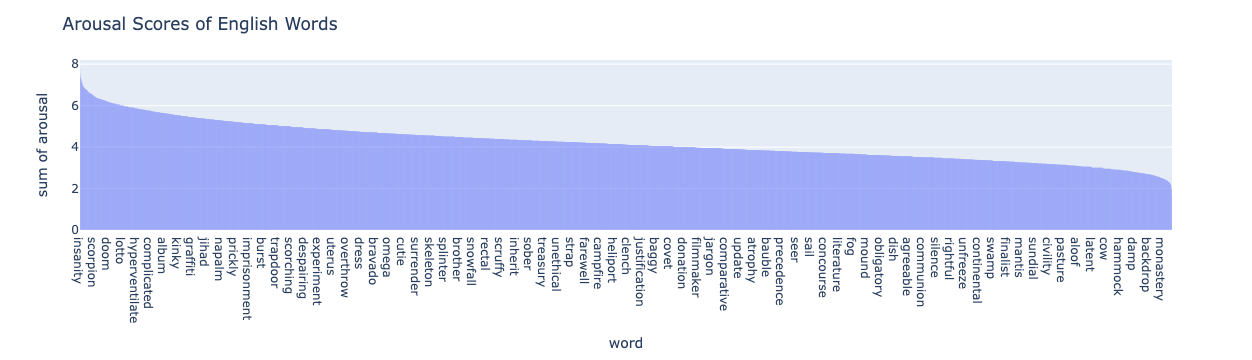

In [7]:
arousal_df = mood_df.sort_values(by=['arousal'], ascending = False)
fig = px.histogram(arousal_df, x=arousal_df.index, y = 'arousal')
fig.update_layout(
    title={
        'text': 'Arousal Scores of English Words',
    })
fig.show()

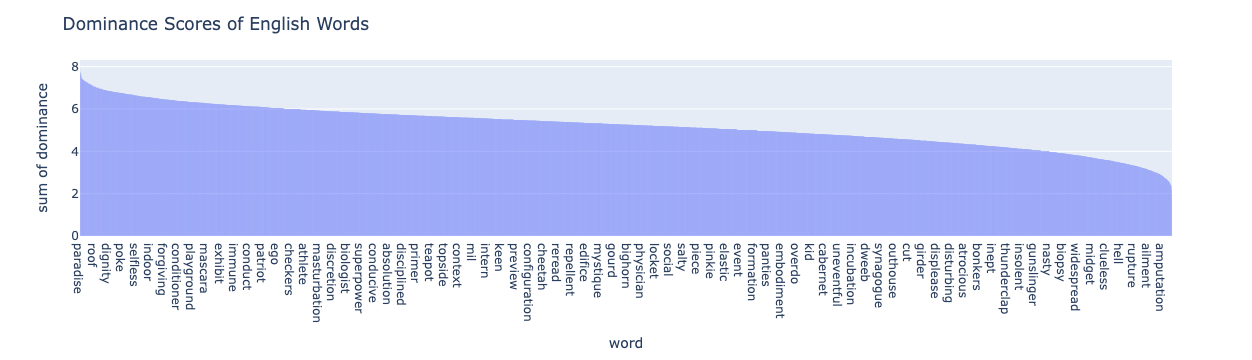

In [11]:
dominance_df = mood_df.sort_values(by=['dominance'], ascending = False)
fig = px.histogram(dominance_df, x=dominance_df.index, y = 'dominance')
fig.update_layout(
    title={
        'text': 'Dominance Scores of English Words',
    })
fig.show()

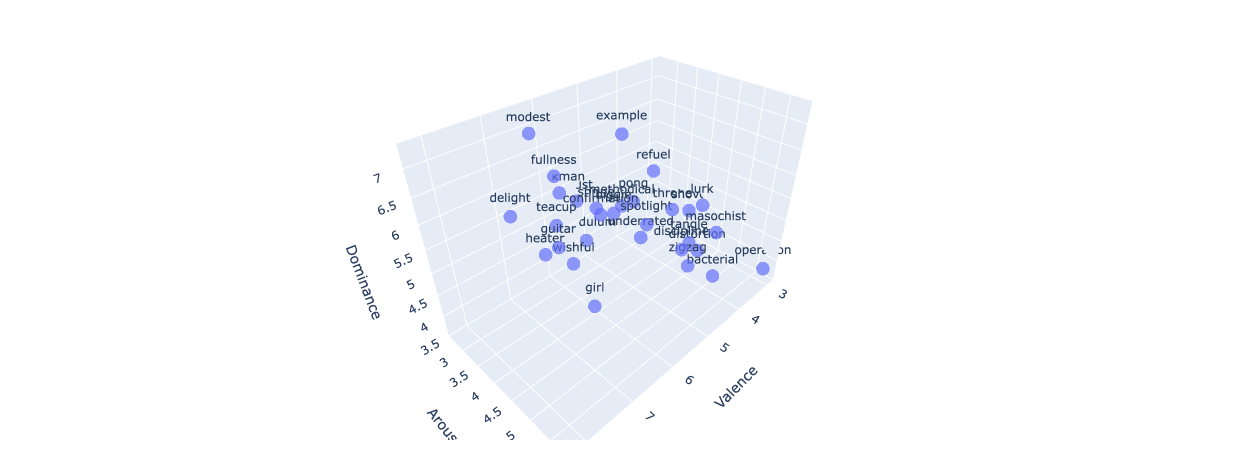

In [77]:
import plotly.express as px
from matplotlib import pyplot as plt
mdf = mood_df.sample(n=30)
df = px.data.iris()
x = mdf['valence']
y = mdf['arousal']
z = mdf['dominance']
fig = px.scatter_3d(df, x=x, y=y, z=z, text=mdf.index, opacity=0.7)
fig.update_layout(
    autosize=False,
    scene = dict(
        xaxis_title='Valence',
        yaxis_title='Arousal',
        zaxis_title='Dominance'),
        width=700,
        margin=dict(r=20, b=10, l=10, t=10))
fig.show()

In [78]:
import pickle
pickle.dump(fig, open('./img/moodplot.fig.pickle', 'wb')) 

## Valence, Arousal, and Dominance for Playlist Songs 

In [46]:
lyrics_df = pd.read_csv('playlist.csv')

def get_valence_arousal_dominance(row):
    
    lyric = row['lyrics_filtered']
    
    if lyric == 'Error: No lyrics found':
        row['valence_lyrics'] = None
        row['arousal_lyrics'] = None 
        row['dominance_lyrics'] = None
        return row
    
    lyric = lyric.split(' ')
    
    # remove duplicate words
    lyric = list(dict.fromkeys(lyric))
    word_count = len(lyric)
    
    valence_sum = 0
    arousal_sum = 0
    dominance_sum = 0
    
    for word in lyric:
        if word in words:
            valence_sum += words[word]['valence']
            arousal_sum += words[word]['arousal']
            dominance_sum += words[word]['dominance']

    valence = valence_sum / word_count
    arousal = arousal_sum / word_count
    dominance = dominance_sum / word_count
    
    row['valence_lyrics'] = valence
    row['arousal_lyrics'] = arousal
    row['dominance_lyrics'] = dominance
    
    return row

lyrics_df = lyrics_df.apply(get_valence_arousal_dominance, axis=1)
lyrics_df.head(10)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.768   0.864   11    -6.145     1       0.0324      0.101000   
1         0.624   0.736    0    -8.821     1       0.0326      0.506000   
2         0.315   0.715   11    -8.072     0       0.0362      0.001250   
3         0.600   0.870    9    -3.413     0       0.0704      0.059300   
4         0.489   0.918    1    -4.502     1       0.0554      0.000035   
5         0.764   0.473    2   -11.145     1       0.0333      0.248000   
6         0.816   0.775   11    -3.323     1       0.2340      0.160000   
7         0.673   0.842    1   -10.171     0       0.0304      0.003190   
8         0.784   0.663    0    -4.925     1       0.0328      0.136000   
9         0.630   0.937    4    -4.839     1       0.0372      0.390000   

   instrumentalness  liveness  valence  ...                      id  \
0          0.000000    0.1620    0.891  ...  1Je1IMUlBXcx1Fz0WE7oPT   
1          0.000001    0.1220    0.824  ...  0dQ3fWOL36Cbrpvgg1jzq3   
2          0.000008    0.0942    0.497  ...  6Qyc6fS4DsZjB2mRW9DsQs   
3          0.006350    0.1040    0.659  ...  4l0HxP8wm5iWHqo9myvFsm   
4          0.000076    0.0908    0.691  ...  0gucTLf7trAf37Ua1uAyAu   
5          0.000016    0.3280    0.397  ...  0gQtd0FQjuJSsuK2qHFYoF   
6          0.000310    0.0543    0.527  ...  503OTo2dSqe7qk76rgsbep   
7          0.000011    0.9520    0.806  ...  3YB6nCSuFqNiqOvPtAPK9X   
8          0.000000    0.0322    0.948  ...  454J9ZekfjmjWbfcpFaur3   
9          0.000002    0.1030    0.834  ...  1NpcXmiVJpDsdaOEejWgTC   

                              artist_uri  \
0  spotify:artist:0uq5PttqEjj3IH1bzwcrXF   
1  spotify:artist:1qC3LsWlbrRCPVRooOX81u   
2  spotify:artist:2sil8z5kiy4r76CRTXxBCA   
3  spotify:artist:2n6FviARgtjjimZXu18uRM   
4  spotify:artist:6olE6TJLqED3rqDCT0FyPh   
5  spotify:artist:518rTAIFPwQjLUSi4Pdzzn   
6  spotify:artist:6DPYiyq5kWVQS4RGwxzPC7   
7  spotify:artist:488v7rQzthLNK22r0UvMie   
8  spotify:artist:2WjMknfXoWEZL4X5QbGd3z   
9  spotify:artist:2wKZKjNTOtH2vjxIsUBZqY   

                                              genres  \
0      ['dance pop', 'europop', 'girl group', 'pop']   
1  ['classic swedish pop', 'dansband', 'danspunk'...   
2  ['alternative rock', 'neo mellow', 'permanent ...   
3  ['alternative dance', 'dance-punk', 'new rave'...   
4               ['grunge', 'permanent wave', 'rock']   
5  ['classic swedish pop', 'danspunk', 'europop',...   
6  ['g funk', 'gangster rap', 'hip hop', 'rap', '...   
7  ['bubblegum dance', 'diva house', 'eurodance',...   
8  ['classic swedish pop', 'dansband', 'danspunk'...   
9                        ['country', 'country dawn']   

                                              lyrics popularity  release_date  \
0  ['[Intro: Scary, Ginger]\nHahaha\nYo, I\'ll te...       84.0    1996-01-01   
1                                             [None]       48.0          1992   
2  ["[Verse 1]\nAnd I'd give up forever to touch ...       84.0    1998-09-11   
3  ['[Intro]\nWho took the bomp?\n\n[Verse 1]\nEv...       69.0    1999-01-11   
4  ["[Verse 1]\nLoad up on guns, bring your frien...       62.0    1991-09-24   
5  ['Vad gör du nuförtiden?\nVarför hör du aldrig...       54.0          1990   
6  ['[Produced by Dr. Dre, Scott Storch and Mel-M...       91.0    1999-11-16   
7  ["[Intro: Melanie Thornton]\nLa da da dee da d...       32.0    1995-03-11   
8  ['[Vers 1]\nHon är en duva som dansar på dunku...       57.0    1993-01-18   
9  ["[Verse 1]\nI hear songs on the radio, they m...       60.0    1993-06-18   

                                     lyrics_filtered valence_lyrics  \
0  hahaha yo i'll tell want really really want te...       2.710333   
1                             Error: No lyrics found            NaN   
2  i'd give forever touch 'cause know feel someho...       3.036939   
3  took bomp? every day night every day night see...       2.758830   
4  load guns bring friends fun lose pretend ov

## Lyrics and audio features

In [75]:
import matplotlib.pyplot as plt
from scipy import stats

lyrics_df = lyrics_df.dropna()
lyrics_df = lyrics_df[lyrics_df['valence_lyrics'] > 0.5]
lyrics_df = lyrics_df[lyrics_df['arousal_lyrics'] > 0.5]
lyrics_df = lyrics_df[lyrics_df['dominance_lyrics'] > 0.5]
x_vars = list(lyrics_df.select_dtypes('number'))

### Valence against Audio Features

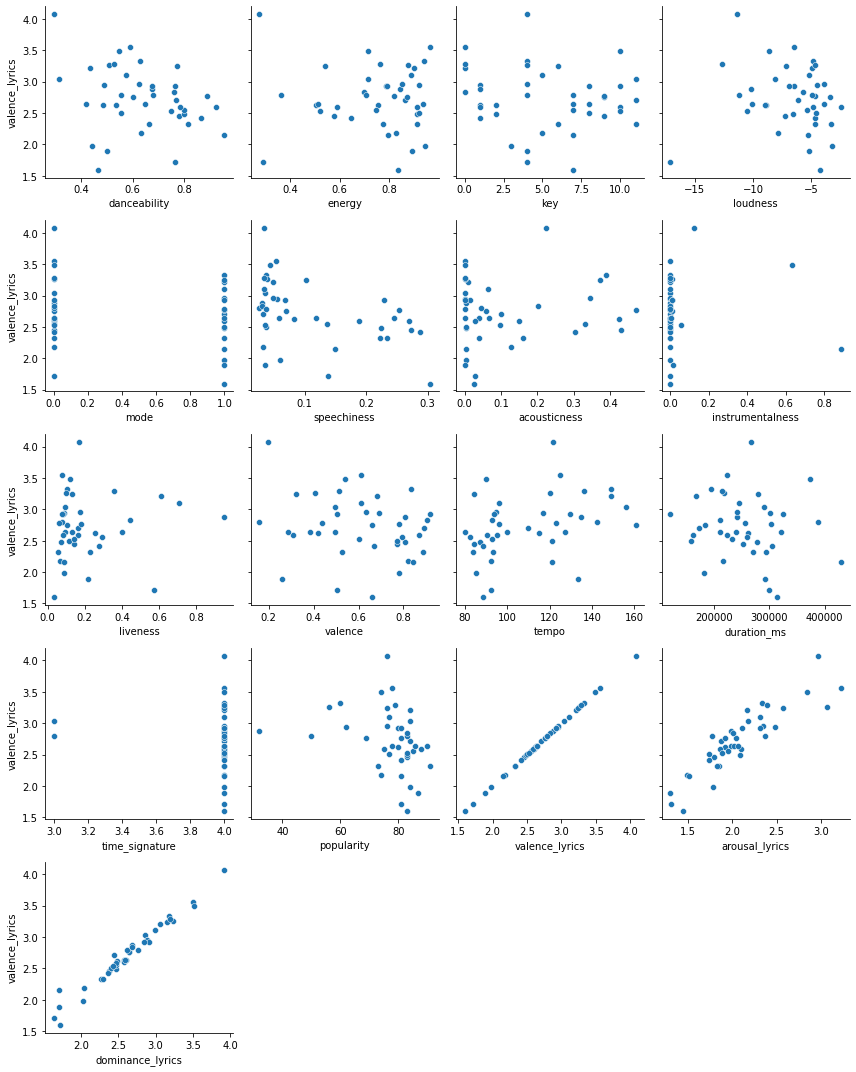

In [52]:
import seaborn as sns

g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=4, sharex=False)
for ax, xvar in zip(g.axes, x_vars):
    sns.scatterplot(data=lyrics_df, x=xvar, y="valence_lyrics", ax=ax)
g.tight_layout()
plt.savefig('./img/valence_grid.png')

### Arousal against Audio Features

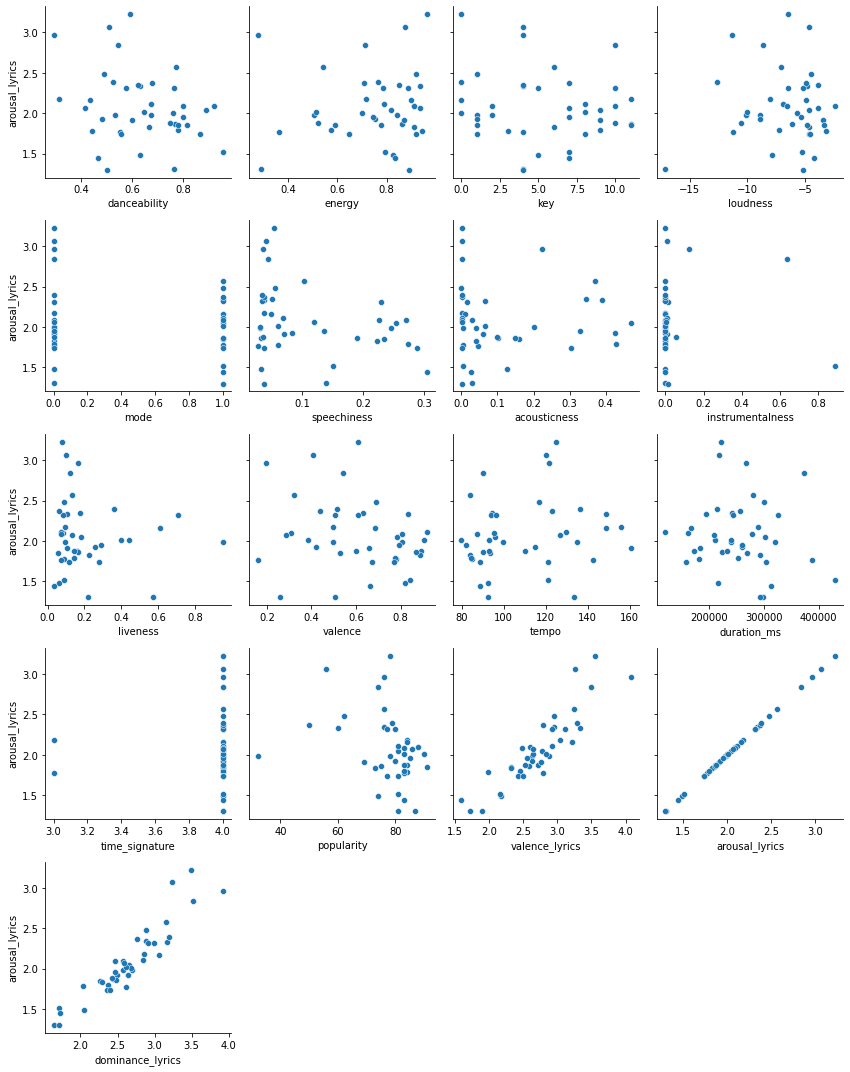

In [53]:
g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=4, sharex=False)
for ax, xvar in zip(g.axes, x_vars):
    sns.scatterplot(data=lyrics_df, x=xvar, y="arousal_lyrics", ax=ax)
g.tight_layout()

### Dominance against Audio Features

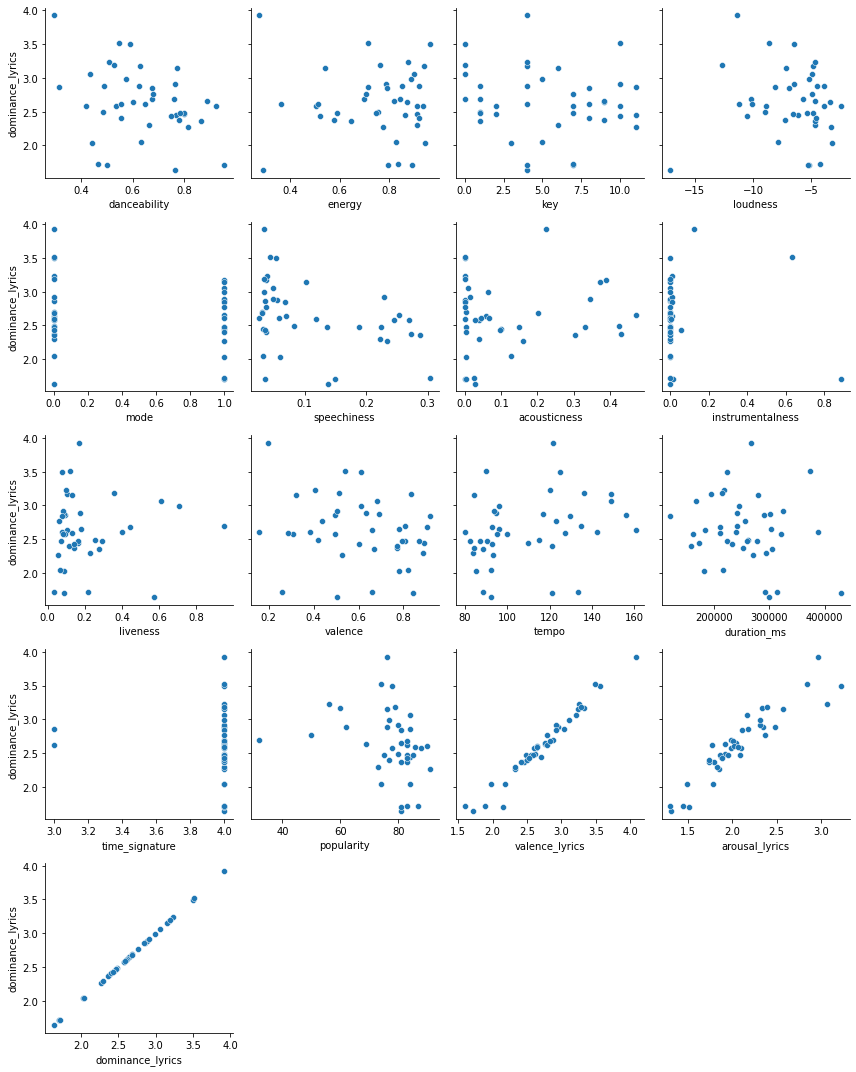

In [54]:
g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=4, sharex=False)
for ax, xvar in zip(g.axes, x_vars):
    sns.scatterplot(data=lyrics_df, x=xvar, y="dominance_lyrics", ax=ax)
g.tight_layout()

### P-values between valence/arousal/dominance and audio features

In [55]:
def spearmanr_pval(x,y):
        return stats.spearmanr(x,y)[1]

spearman_pvalue = lyrics_df.corr(method=spearmanr_pval)
spearman_pvalue = spearman_pvalue.loc[['valence_lyrics', 'arousal_lyrics', 'dominance_lyrics']]
spearman_pvalue

danceability    energy       key  loudness      mode  \
valence_lyrics        0.036690  0.902334  0.306589  0.161420  0.537143   
arousal_lyrics        0.151560  0.526026  0.484805  0.597906  0.837369   
dominance_lyrics      0.036163  0.900193  0.273186  0.248645  0.520231   

                  speechiness  acousticness  instrumentalness  liveness  \
valence_lyrics       0.003332      0.439062          0.200793  0.453421   
arousal_lyrics       0.183623      0.196858          0.175792  0.945701   
dominance_lyrics     0.017824      0.377052          0.192067  0.566586   

                   valence     tempo  duration_ms  time_signature  popularity  \
valence_lyrics    0.226782  0.002558     0.296965        0.370603    0.007759   
arousal_lyrics    0.122133  0.115714     0.406761        0.766414    0.019793   
dominance_lyrics  0.134330  0.009495     0.383008        0.592364    0.005033   

                  valence_lyrics  arousal_lyrics  dominance_lyrics  
valence_lyrics      1.000000e+00    1.666928e-15      8.700203e-32  
arousal_lyrics      1.666928e-15    1.000000e+00      1.394743e-18  
dominance_lyrics    8.700203e-32    1.394743e-18      1.000000e+00

### Correlation Coefficient between valence/arousal/dominance and audio features

In [76]:
spearman_corr = lyrics_df.corr(method='spearman')
spearman_corr = spearman_corr.loc[['valence_lyrics', 'arousal_lyrics', 'dominance_lyrics']]
spearman_corr.to_csv("./img/spearman_corr")
spearman_corr

danceability    energy       key  loudness      mode  \
valence_lyrics       -0.327352  0.019774 -0.163654 -0.222822 -0.099211   
arousal_lyrics       -0.228049  0.101921 -0.112228 -0.084843 -0.033070   
dominance_lyrics     -0.328223  0.020210 -0.175219 -0.184321 -0.103345   

                  speechiness  acousticness  instrumentalness  liveness  \
valence_lyrics      -0.447735     -0.124216          0.203992  0.120383   
arousal_lyrics      -0.211847     -0.205749          0.215603 -0.010976   
dominance_lyrics    -0.368293     -0.141638          0.207922  0.092160   

                   valence     tempo  duration_ms  time_signature  popularity  \
valence_lyrics   -0.192953  0.458711    -0.166899       -0.143542   -0.410017   
arousal_lyrics   -0.245307  0.249477    -0.133101        0.047847   -0.362653   
dominance_lyrics -0.237815  0.400348    -0.139895       -0.086125   -0.429853   

                  valence_lyrics  arousal_lyrics  dominance_lyrics  
valence_lyrics          1.000000        0.898258          0.985714  
arousal_lyrics          0.898258        1.000000          0.930314  
dominance_lyrics        0.985714        0.930314          1.000000

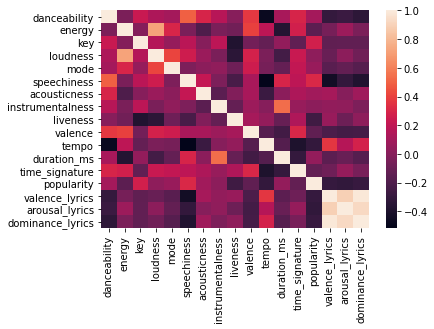

In [39]:
import seaborn as sn
corrMatrix = lyrics_df.corr()
sn.heatmap(corrMatrix)
plt.show()